In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-01 05:29:13.539794: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 05:29:13.567306: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 05:29:13.704950: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 05:29:13.707110: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw[df_rating_raw['Title'] == 'West Side story']

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814312,B000711OZC,West Side story,NaN,A3FV7U97W17PK,"M. Chaerani ""music sheet collector""",26/26,5.0,1145491200,Great transcription of the full score,If you're looking for a faithful translation f...
1814313,B000711OZC,West Side story,NaN,A14ES1GLFF6RZ9,"The Pianoman ""Producer/Arranger""",6/7,5.0,1189987200,West Side Vocal Score,If you want to play/arrange/orchestrate or sim...
1814314,B000711OZC,West Side story,NaN,APYTEBHJXFT18,Teen,4/5,4.0,1167177600,For the intermediate,The book is medium-it isn't an easy book you o...
1814315,B000711OZC,West Side story,NaN,A3H9EZYOVG81TW,Broadway Fan,1/1,5.0,1332374400,West Side Story,This book is perfect. We are rehearsing West S...
1814316,B000711OZC,West Side story,NaN,A1IWMVQGALYNVK,C. Morgan,3/4,5.0,1199145600,High Quality Printing,The piano and vocals are clearly printed which...
1814317,B000711OZC,West Side story,NaN,AZUS7ZIZWEJ0B,"Rebecca L. Gosselin ""Capegirl78""",0/0,5.0,1355702400,Fab!,this was perfect - I wanted to real versions o...
1814318,B000711OZC,West Side story,NaN,A1F2FPNK5VBJZ4,"W. Smith ""Future Tony Winner""",0/0,5.0,1264636800,A Composer/Orchestrator's Best Friend,My original intention was to buy this and use ...
1814319,B000711OZC,West Side story,NaN,A2DGD1PGXR5BZM,Olivertrst,0/1,3.0,1319241600,Disappointed -- Bent in shipping,I was disappointed when I received this book i...
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."


In [5]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
538375,0940450828,Mark Twain : Historical Romances : Prince & th...,23.21,A3M3ZSEP3JL3GS,Margaret Fiore,16/16,5.0,919382400,A fabulous collection of perhaps Twain's very ...,This collection contains my 2 childhood and al...
1575899,B000MXD0LQ,Flatland: A Romance of Many Dimensions,NaN,ANRE1BJ0Q4PLS,R. Pokkyarath,0/0,5.0,1322092800,Dimensional Difference in Perspective,You start appreciating the beauty of this work...
309623,1857445139,Easy Guide to the Nimzo-Indian,NaN,A28JEAUF4AE31I,"JIMMY SANDBERG ""bookman""",10/11,4.0,1062547200,A sound Nimzo-repertoire for black,Many GM:s have expressed that the author of 'E...
1232552,B000DEN1G8,Lie Down with Lions,NaN,A367IQ9VV13F21,Britlady,0/0,5.0,1358380800,A compelling read.,"I could not put this book down, the story, cha..."
931834,058240262X,Four Weddings and a Funeral (Penguin Longman R...,NaN,A2EJ2HM103NKXJ,S. Asnes,0/0,5.0,1360800000,One of my favorites.,I never tire of this movie. It's a great movie...
378634,B000BKUZYA,The Hitchhiker's Guide to the Galaxy,NaN,NaN,NaN,0/0,5.0,934070400,the increasingly inaccurately named hitchikers...,ok.. the earth has been demolished by the voga...
2478169,B0007KG3A4,The Non-Statistical Man,NaN,AT3NAB80O6QDA,steevithak,1/1,4.0,1331164800,The Non-statistical Man by Raymond F. Jones,The Non-statistical Man is a collection of fou...
2052849,0864733356,In a Fishbone Church,NaN,A35VAGYEXWMPQH,Sooty Shearwater,10/10,5.0,960249600,Lapidary prose from new New Zealand writer,Catherine Chidgey is a writer to watch out for...
1161577,0814405657,The Fearless Executive,NaN,A131O4DJXTS85H,Donna M. McCoy (Tim McCoy),4/4,5.0,966643200,Perfect Timing,I picked up The Fearless Executive just as I w...
2501016,B0006L89KQ,Love at Goon Park: Harry Harlow and the Scienc...,NaN,AWHM61Z2OTY1G,Alma Bowen,6/9,5.0,1035417600,This book provided reassurance for me as a mother,"Love at Goon Park is about Harry Harlow, a sci..."


In [6]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
18445,The Kabbalah,Comprising well over a thousand pages of dense...,['Pinchas Giller'],http://books.google.com/books/content?id=qloL-...,http://books.google.nl/books?id=qloL-PJdtzYC&p...,Oxford University Press,2000-12-07,https://play.google.com/store/books/details?id...,['Religion'],NaN
25455,Tribes,"The New York Times, BusinessWeek, and Wall Str...",['Seth Godin'],http://books.google.com/books/content?id=7f1Dy...,http://books.google.com/books?id=7f1DyktinKoC&...,Penguin,2008-10-16,http://books.google.com/books?id=7f1DyktinKoC&...,['Business & Economics'],55.0
77733,Percorsi: l'Italia attraverso la lingua e la c...,NaN,"['Francesca Italiano', 'Irene Marchegiani']",NaN,http://books.google.com/books?id=bHQlnwEACAAJ&...,Pearson College Division,2014-02-03,http://books.google.com/books?id=bHQlnwEACAAJ&...,['Foreign Language Study'],NaN
3380,GPRS and 3G Wireless Applications: Professiona...,To ensure competitive advantage for their comp...,['Christoffer Andersson'],http://books.google.com/books/content?id=6QlPN...,http://books.google.nl/books?id=6QlPNB755YkC&p...,John Wiley & Sons,2002-03-14,https://play.google.com/store/books/details?id...,['Technology & Engineering'],NaN
6860,Charlie's Great Adventure,Charlie the cat and his friend Frisky become l...,['C. A. Goody'],NaN,http://books.google.nl/books?id=Ae3APQAACAAJ&d...,NaN,2004-12-01,http://books.google.nl/books?id=Ae3APQAACAAJ&d...,['Camping'],NaN
202688,"Records and badges of the British Army,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27610,Transforming Body Image: Learning to Love the ...,"Offers clarity, wisdom and caring guidance for...",['Marcia Germaine Hutchinson'],http://books.google.com/books/content?id=aXnBw...,http://books.google.com/books?id=aXnBwAEACAAJ&...,NaN,1985,http://books.google.com/books?id=aXnBwAEACAAJ&...,['Social Science'],NaN
120184,"Knott's Handbook for Vegetable Growers, 4th Ed...",The leading one-stop reference for commercial ...,"['Donald N. Maynard', 'George J. Hochmuth']",http://books.google.com/books/content?id=q3tdB...,http://books.google.nl/books?id=q3tdBe7YTH8C&p...,John Wiley & Sons,2006-10-13,http://books.google.nl/books?id=q3tdBe7YTH8C&d...,['Technology & Engineering'],NaN
106234,Theories of Adolescence (A Random House Study ...,NaN,['Rolf Eduard Helmut Muuss'],NaN,http://books.google.com/books?id=u1JtvgAACAAJ&...,NaN,1962,http://books.google.com/books?id=u1JtvgAACAAJ&...,['Adolescence'],1.0
138210,Stochastic behavior of the world economy under...,NaN,['Joseph E. Gagnon'],http://books.google.com/books/content?id=K9q3A...,http://books.google.com/books?id=K9q3AAAAIAAJ&...,NaN,1992,http://books.google.com/books?id=K9q3AAAAIAAJ&...,['Monetary policy'],NaN


In [8]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [9]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [59]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.  
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [60]:
df_rating_processed.sample(10)

,Title,User_id,review/helpfulness,review/score,review/time,review/text
2436412,Harvest,A2Q5NVJ81J4NQV,2/2,4.0,1129161600,This is the first novel by Tess Gerritsen that...
2356404,Absolute Beginner's Origami: The Simple Three-...,A282BDGW975UDG,10/10,5.0,1104969600,"This book gives the best, eastiest to understa..."
577140,Charlie and the Chocolate Factory:A Play,A11I1I9QLMAM1A,0/0,5.0,1311984000,Charlie and the Chocolate Factory by Roald Dah...
1083494,"Violations (Star Trek Voyager, No 4)",A1GZ8B89R99S1,1/3,5.0,960768000,This book did have a few errors but no one is ...
1799436,The Phantom of Manhattan,A2E6Y5SG3W1YVN,5/7,1.0,1057104000,"Of course, if you are not familiar with Phanto..."
1237243,Black storm (Tales of the modern Navy),A3P3UOHYBFRGJN,1/1,4.0,1084838400,With lots of up to date military action and te...
204353,The Epic of Gilgamesh: An English Version With...,A20WLS3Z0P1DGG,0/0,5.0,1317168000,I believe that all western cultures should rea...
313029,Riding Freedom,A2FUHC82Y5UYMA,0/0,4.0,1253664000,Riding Freedom is an adventureous book about a...
2792515,Unfit for Command: Swift Boat Veterans Speak O...,A268FJT5BPKEVM,43/56,5.0,1094169600,Please do not buy your books from Amazon.com. ...
2916753,"Love in Excess: Or, The Fatal Enquiry (Broadvi...",A1589D3D4RO25R,3/5,1.0,1265328000,This has possibly been the single most unreada...


In [61]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [62]:
df_rating_processed.isna().sum()

title             208
user_id        561787
helpfulness         0
review              0
review_time         0
text                8
dtype: int64

In [63]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [64]:
#CLEAN THE DATASETS

In [65]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [66]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
143213,Advances in Cryptology 1981 - 1997: Electronic...,"['Kevin S. McCurley', 'Claus D. Ziegler']",Springer,2003-05-15,['Computers']
113885,Angel Pavement,['John Boynton Priestley'],NaN,1968,['Businessmen']
153426,Get Real: A Student's Guide To Money: A Studen...,"['James Tenuto', 'Susan Schwartzwald']",Harcourt,1992,['Business & Economics']
49280,"Caitlin: A Love Trilogy : Loving, Love Lost, T...","['Francine Pascal', 'Random House Publishing G...",Bantam Dell Publishing Group,1986-10-01,NaN
135842,Introduction to PASCAL and Structured Design,"['Nell B. Dale', 'Chip Weems']",NaN,1988,['Computer programming']


In [67]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [68]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [69]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [70]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
72656,"Groundswell: Stories of Saving Places, Finding...",['Alix W. Hopkins'],Trust of Public Land,['Nature'],2005
206215,"Old Toney and his master, or, The abolitionist...",['Desmos'],NaN,['HISTORY'],1861
173356,Penelope the Damp Detective 1ST Edition,['R. Reginald'],Wildside Press LLC,['Reference'],2010
59133,Handbook of transfusion medicine,['United Kingdom Blood Services'],NaN,['Blood'],2013
5823,Dinosaur Wars: Counterattack,['Thomas P. Hopp'],CreateSpace,['Fiction'],2014
54357,Absence from Felicity : The Story of Helen Sch...,['Kenneth Wapnick'],Foundation for a Course in,['Religion'],1991
190837,"Mom, I Hate You! Children's Provocative Commun...","['Don Fleming', 'Mark Ritts']",Three Rivers Press (CA),['Family & Relationships'],2003
52447,Handbook for Research in American History: A G...,['Francis Paul Prucha'],U of Nebraska Press,['History'],1994
10699,Exam Cram for Networking Technologies CNE (Exa...,"['Joel Stegall', 'David Johnson', 'Mary T. Mad...",Coriolis Group,['Computers'],1998
150537,Roald Dahl's James and the Giant Peach (A Play...,['Roald Dahl'],ePenguin,['Juvenile Nonfiction'],2001


In [71]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [72]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [73]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [74]:
df_rating_processed.sample(5)

,title,user_id,helpfulness,review,review_time,text
615505,Maui Revealed: The Ultimate Guidebook,A1UUWGQ4WAJLDY,0/0,5.0,1268092800,"I already have ""Big Island Revealed"" so I knew..."
1238161,Denison's ice road,A2DFFDS6X548QE,0/1,5.0,1223596800,I AM VERY HAPPY WITH THIS PURCHASE. I TOTALLY ...
1137776,The Greatest Generation,A5VBPET9KPYPB,3/6,5.0,1081814400,Tom Brokaw's novel The Greatest Generation was...
1678388,Pride and Prejudice,A21NVBFIEQWDSG,3/3,5.0,1192406400,Pride and Prejudice is probably the most well-...
2377242,Touching the Void: The True Story of One Man's...,A2MFTMKQGMKQH7,0/0,5.0,1250812800,"Told in first person, this story of Joe's surv..."


In [75]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [76]:
df_rating_processed.sample(10)

,title,user_id,helpfulness,review,text,review_year
912544,Today Book Club Pick June 2003 Selection,AK1NACH74SH7K,6/9,2.0,"Come on people, don't you want even a little m...",2005
2456214,Sense & Sensibility Cds (Penguin Classics),A3OH101U0CPUC7,2/2,5.0,I picked up this book largely due to fond memo...,2007
132977,Successful wine making at home,A9W4M38DHRVIW,3/3,5.0,It turned out surprising well. This book is gr...,2010
1593436,The Once and Future King,A3B9QABFEA2VKD,1/1,5.0,The Once and Future King provides an excellent...,2004
2158399,Pilots and Navigators (Oxford Poets),A1J0LFPTKWLCBY,1/1,5.0,"I admit firstly that he's my brother, and OK I...",2000
2464178,Elementary differential equations,A2KBGF4OO1UQ3W,2/3,2.0,"I agree with the review dated March 14, 1999. ...",2000
54581,SCWCD Exam Study Kit: Java Web Component Devel...,ACG7YIFAANPWC,2/3,5.0,This is an excellent book for the SCWCD exam; ...,2004
2727197,The Kaisho: A Nicholas Linnear Novel,A1IDDAE9L2R73Z,1/2,5.0,I finished THE KAISHO last night and will be s...,2012
1737109,How to Say It At Work: Putting Yourself Across...,NaN,11/19,1.0,This book was written for people who truly hav...,2003
669982,Rediscovering Catholicism: Journeying Toward O...,A2HXT3L8VYC1LO,1/2,5.0,I highly recommend this book. Matthew Kelley i...,2009


In [77]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [78]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [79]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1
1364303,mr. gumpy's outing,A1DYR5K4J4N4VL,4.0,`Mr. Gumpy's Outing' is a story possibly depic...,2012,0.000000,1.000000
505317,The Erotic Anime Movie Guide,NaN,5.0,If you've tried a couple hentai anime films an...,1999,1.000000,1.000000
2074101,The Mother Tongue,A1SAAHHEE05YU5,5.0,I don't care about the errors. When I was aske...,2000,0.400000,0.400000
1284,Economics in one lesson,A2ML31G0953CPG,5.0,Mr. Hazlitt has done an amazing job of removin...,2013,0.000000,1.000000
2181171,The Bible Code,NaN,1.0,I cannot believe anyone would buy this bullsh*...,2003,0.473684,0.473684
147309,The Joy Of Photography,NaN,5.0,"I have advanced beyond this book, but it was a...",2001,1.000000,1.000000
2232798,Inherit the wind (A Random House play),ALCJOIWRDZAY,5.0,This play is great. I read it in 10th grade an...,2004,0.000000,1.000000
718635,The Thinking Woman's Guide to a Better Birth,A316D2ZNH66EQ9,2.0,Horrible and outdated book. She needs to cite ...,2012,0.500000,0.500000
186092,Prep,AC9B29BXXWJHD,5.0,I have no idea why I kep tputting off reading ...,2007,0.000000,0.000000
2353238,Edwin of the Iron Shoes,A3B03YYB7VE8L8,4.0,"Good story, believable heroine, interesting se...",2012,0.000000,1.000000


In [80]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   helpfulness_0   float64
 6   helpfulness_1   float64
 7   authors         object 
 8   publisher       object 
 9   categories      object 
 10  published_year  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 223.8+ MB


In [81]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
1695411,Speaker for the Dead,A236PDCSYIOQBU,2.0,Jaws 2 was a movie that never needed to be mad...,2013,0.000000,1.000000,[Orson Scott Card],Tor Books,[Fiction],2009
2215742,How To Meditate: A Step-by-Step Guide to the A...,A26I28QA7DC364,3.0,I've read a lot of books on this subject and t...,2013,0.000000,1.000000,[John Novak],Crystal Clarity Pubs,"[Body, Mind & Spirit]",1992
1436250,The Sky Observer's Guide,A356TCKIKG9CSR,4.0,I've been a pretty active amateur astronomer f...,2000,0.888889,0.888889,"[R. Newton Mayall, Margaret Mayall, Jerome Wyc...",Golden Guides from St. Martin's Press,[Nature],2014
1881139,Harper Lee's To Kill a Mockingbird (Barron's B...,NaN,5.0,"As a present to myself, I reread this book onc...",2000,1.000000,1.000000,"[Joyce Milton, Harper Lee]",Turtleback Books,[Juvenile Nonfiction],1984
1771532,Merrick (Vampire Chronicles),A8M05DFVANYP,3.0,This is only the second Rice book I've read (t...,2001,1.000000,1.000000,[Anne Rice],Ballantine Books,[Fiction],2001
2504856,The Dante Club,A2KKXV0HG92CJ8,5.0,The Dante Club by Matthew Pearl had two things...,2003,0.846154,0.846154,[Matthew Pearl],Random House Trade Paperbacks,[Fiction],2004
395579,Huge Harold,NaN,5.0,My brother received this book as a gift in 196...,1999,1.000000,1.000000,NaN,Houghton Mifflin Harcourt,[Juvenile Fiction],1961
533945,Pride and Prejudice,A36ROADM61C1E2,5.0,Pride and Prejudice was a fantastic book. I st...,2011,1.000000,1.000000,[Jane Austen],Courier Corporation,[Fiction],1995
591687,Gap Creek: The Story Of A Marriage (Oprah's Bo...,A316VUV5CX7VRN,5.0,Even though Gap Creek was based in the time pe...,2005,0.625000,0.625000,[Robert Morgan],Algonquin Books,[Fiction],2012
1208000,Hombre,A3F6MUPG0HJDNO,5.0,If you haven't seen the 1966 movie take on Elm...,2009,1.000000,1.000000,[Lewis Sperry Chafer],Editorial Portavoz,[Religion],1973


In [82]:
#APPLY PARETO PRINCIPLE:
# Pareto Principle, also known as the 80/20 rule, is used for reducing the dataset based on the most reviewed books 
# This is a good approach to focus on the most significant or popular books. The Pareto Principle suggests that 
# roughly 80% of the effects come from 20% of the causes. In this case, Pareto principle to identify
# and keep the most influential books and their associated reviews. 

In [83]:
# Group the reviews by book and count the number of reviews for each book
book_reviews_count = df_all_data_processed['title'].value_counts().reset_index()
book_reviews_count.columns = ['title', 'num_reviews']

In [84]:
book_reviews_count.sample(10)

,title,num_reviews
120074,Growing Your Family Medical Tree,2
109340,Living With Back Pain (Living With... Series),2
54056,Essays That Will Get You into Business School,6
35888,One Pot Cakes: 60 Recipes for Cakes from Scrat...,10
182448,Hegemony: A Realist Analysis (Routledge Studie...,1
128791,Empowered With Mary: Affirming Full Personhood...,2
472,America Alone: The End of the World as We Know It,602
11654,Lateral Thinking: A Textbook of Creativity (Pe...,33
151736,Gabriela Mistral: poesa,1
47480,James Dean: Fifty Years Ago,8


In [85]:
# Sort the DataFrame by the number of reviews in descending order
book_reviews_count.sort_values(by='num_reviews', ascending=False, inplace=True)

In [86]:
book_reviews_count.head(10)

,title,num_reviews
0,The Hobbit,22023
1,Pride and Prejudice,20371
2,Wuthering Heights,10780
3,The Giver,7644
4,Great Expectations,7421
5,Harry Potter and The Sorcerer's Stone,6796
6,Brave New World,6312
7,Mere Christianity,6053
8,The Picture of Dorian Gray,5883
9,Persuasion,5498


In [87]:
# Calculate the cumulative percentage of reviews
total_reviews = book_reviews_count['num_reviews'].sum()
book_reviews_count['cumulative_percentage'] = (book_reviews_count['num_reviews'].cumsum() / total_reviews) * 100
book_reviews_count.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [88]:
pareto_threshold = 20
# Select the subset of books that make up the top Pareto_threshold% of reviews
selected_books = book_reviews_count[book_reviews_count['cumulative_percentage'] <= pareto_threshold]
selected_books.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [89]:
df_all_data_filtered_processed = df_all_data_processed.merge(selected_books, on='title', how='inner')
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532868 entries, 0 to 532867
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  532868 non-null  object 
 1   user_id                406985 non-null  object 
 2   review                 532868 non-null  float64
 3   text                   532868 non-null  object 
 4   review_year            532868 non-null  int64  
 5   helpfulness_0          532868 non-null  float64
 6   helpfulness_1          532868 non-null  float64
 7   authors                526675 non-null  object 
 8   publisher              448830 non-null  object 
 9   categories             465707 non-null  object 
 10  published_year         532868 non-null  int64  
 11  num_reviews            532868 non-null  int64  
 12  cumulative_percentage  532868 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 52.9+ MB


In [90]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['cumulative_percentage'], axis=1)

In [91]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    336553
4.0     95230
3.0     40291
1.0     35916
2.0     24878
Name: count, dtype: int64

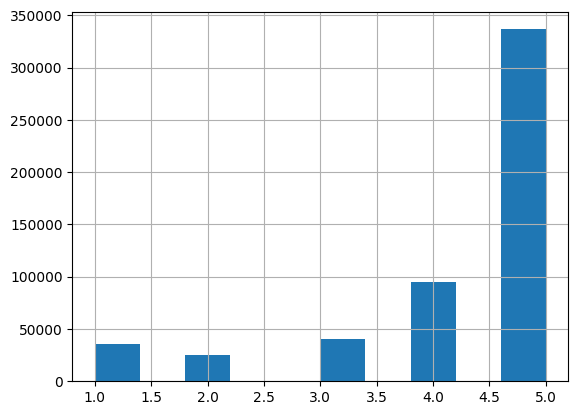

In [92]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [93]:
df_all_data_filtered_processed.isna().sum()

title                  0
user_id           125883
review                 0
text                   0
review_year            0
helpfulness_0          0
helpfulness_1          0
authors             6193
publisher          84038
categories         67161
published_year         0
num_reviews            0
dtype: int64

In [94]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year,num_reviews
422208,Left Behind - A Novel Of The Earth's Last Days,NaN,5.0,This book made me realize how far from God I w...,1999,0.000000,0.000000,"[Tim F. LaHaye, Jerry B. Jenkins]","Tyndale House Publishers, Inc.",[FICTION],2011,2515
494661,Path of Daggers (Wheel of Time 08),NaN,3.0,"Well, I spent my $24.95 on Jordan's latest. Le...",1998,0.000000,0.000000,[Robert Jordan],Tor Books,[Fiction],2010,1840
357715,Alice in Wonderland,ALZXYOCWKTVNU,4.0,"From the imagination of Lewis Carrol, Alice's ...",2012,0.000000,1.000000,[Lewis Carroll],NaN,[Adventure and adventurers],1869,1520
113272,The Devil Wears Prada,A2LYHWMIM6UK0Q,4.0,I bought this book at the Linate airport and r...,2006,1.000000,1.000000,[Lauren Weisberger],Random House,[Fiction],2003,1072
38503,The Stranger,NaN,5.0,This Book was very interesting and kept my apt...,1999,0.000000,1.000000,[Harlan Coben],Orion,NaN,2016,3223
199052,The Hobbit,AW65W5HLVGMZA,5.0,I read &#34;Lord of the Rings&#34; first but w...,2013,1.000000,1.000000,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012,22023
348468,"A Feast for Crows (A Song of Ice and Fire, Boo...",A34P1BY9M9V0WQ,3.0,"If you're reading this, you're probably alread...",2008,0.571429,0.571429,[George R. R. Martin],Bantam,[Fiction],2014,1832
367696,Harry Potter & the Prisoner of Azkaban,NaN,5.0,"The Harry Potter books are all enthralling, an...",1999,0.000000,1.000000,[Lisa S. Brenner],McFarland,[Literary Criticism],2015,2947
484546,Blink: The Power of Thinking Without Thinking,AEYEAH3C78BBZ,4.0,Classical music was once almost exclusively th...,2006,0.666667,0.666667,[Malcolm Gladwell],Back Bay Books,[Business & Economics],2007,2855
89204,Catch 22,A1EWR8E86W2LGS,4.0,The spotlight in which Catch-22 has remained s...,2005,0.000000,0.000000,[Joseph Heller],Simon and Schuster,[Fiction],1999,2084


In [95]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['title','user_id', 'review', 'text'])

# Final Preprocesing from EDA Findings

## Helpfulness Outliers

During the EDA, it was discovered a single Outlier for helpfulness column

In [96]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    339620.000000
mean          0.358999
std           0.413564
min           0.000000
25%           0.000000
50%           0.000000
75%           0.777778
max           3.000000
Name: helpfulness_0, dtype: float64

In [97]:
# During the EDA, it was discovered a single Outlier for helpfulness column
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    339620.000000
mean          0.758145
std           0.352530
min           0.000000
25%           0.500000
50%           1.000000
75%           1.000000
max           3.000000
Name: helpfulness_1, dtype: float64

In [98]:
df_all_data_filtered_processed.shape

(339620, 12)

In [99]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 3].index)
df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 3]['helpfulness_0'].value_counts()

Series([], Name: count, dtype: int64)

In [100]:
df_all_data_filtered_processed.shape

(339619, 12)

In [101]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    339619.000000
mean          0.758138
std           0.352509
min           0.000000
25%           0.500000
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness_1, dtype: float64

In [102]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    339619.000000
mean          0.358991
std           0.413539
min           0.000000
25%           0.000000
50%           0.000000
75%           0.777778
max           1.000000
Name: helpfulness_0, dtype: float64

## Book Authors Names

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [144]:
df_all_data_filtered_processed.sample(10, random_state=75) #Random Sample 75 shows an example for [J.R.R. Tolkien] and [John Ronald Reuel Tolkien]

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year,num_reviews
483021,Blink: The Power of Thinking Without Thinking,A1ULT0DH7BS1JD,2.0,I bought this book because the introductory st...,2008,0.666667,0.666667,[Malcolm Gladwell],Back Bay Books,[Business & Economics],2007,2855
230534,The Lord of the Rings - Boxed Set,A3MWUAF8NBBJLD,5.0,I'm very pleased with this book. It's beautifu...,2007,1.000000,1.000000,[J.R.R. Tolkien],HarperCollins,[Young Adult Fiction],2012,2468
492611,On the Road,A2EAJVYAHW6QBZ,4.0,I can't remember where I read this (I think Ki...,2003,0.000000,1.000000,[Cormac McCarthy],Vintage,[Fiction],2007,897
8680,Fahrenheit 451,A300F70EX0G688,5.0,This was a great book especially the ending of...,2013,0.000000,1.000000,[Ray Bradbury],NaN,[Book burning],2012,4932
311838,Wuthering Heights (Riverside editions),A3BSA8PG85TR14,2.0,While I know this is considered a great Classi...,2012,0.666667,0.666667,[Emily Brontë],NaN,NaN,1963,1080
520174,The Lord Of The Rings THREE VOLUME BOXED SET (...,NaN,5.0,"While at school, I encountered this book, whic...",1999,0.000000,1.000000,[John Ronald Reuel Tolkien],NaN,[Fantasy fiction],2007,2478
162898,Pride and Prejudice,A23JY8430VRRZP,5.0,I recommend this book for all to read if you a...,2013,0.000000,1.000000,[Jane Austen],Courier Corporation,[Fiction],1995,20371
445960,Jane Eyre (Large Print),ASXVDCXCY2KAD,5.0,I thoroughly enjoyed Jane Eyre. It was a great...,2012,0.000000,1.000000,"[Charlotte Brontë, Marc Cactus]",NaN,[Fiction],2019,1523
81928,Brave New World,A2RFG9LI7JDILS,5.0,Aldous Huxley was a man with extensive knowled...,2006,0.800000,0.800000,[Aldous Huxley],Random House,[Fiction],2008,6312
274315,His Dark Materials Trilogy,A1NN8Q1DLAYPGH,5.0,I read all three books. I thought they all wer...,2007,0.818182,0.818182,[Philip Pullman],Everyman Paperback Classics,[Fiction],2011,1228


In [145]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [147]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339619 entries, 0 to 532867
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           339619 non-null  object 
 1   user_id         253151 non-null  object 
 2   review          339619 non-null  float64
 3   text            339619 non-null  object 
 4   review_year     339619 non-null  int64  
 5   helpfulness_0   339619 non-null  float64
 6   helpfulness_1   339619 non-null  float64
 7   authors         334205 non-null  object 
 8   publisher       282176 non-null  object 
 9   categories      309344 non-null  object 
 10  published_year  339619 non-null  int64  
 11  num_reviews     339619 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 33.7+ MB


In [149]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [150]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

In [152]:
df_all_data_filtered_processed.sample(10, random_state=75) #Random Sample 75 shows now Tolkien name standarized to "J.R.R. Tolkien"

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year,num_reviews
483021,Blink: The Power of Thinking Without Thinking,A1ULT0DH7BS1JD,2.0,I bought this book because the introductory st...,2008,0.666667,0.666667,[Malcolm Gladwell],Back Bay Books,[Business & Economics],2007,2855
230534,The Lord of the Rings - Boxed Set,A3MWUAF8NBBJLD,5.0,I'm very pleased with this book. It's beautifu...,2007,1.000000,1.000000,[J. R. R. Tolkien],HarperCollins,[Young Adult Fiction],2012,2468
492611,On the Road,A2EAJVYAHW6QBZ,4.0,I can't remember where I read this (I think Ki...,2003,0.000000,1.000000,[Cormac McCarthy],Vintage,[Fiction],2007,897
8680,Fahrenheit 451,A300F70EX0G688,5.0,This was a great book especially the ending of...,2013,0.000000,1.000000,[Ray Bradbury],NaN,[Book burning],2012,4932
311838,Wuthering Heights (Riverside editions),A3BSA8PG85TR14,2.0,While I know this is considered a great Classi...,2012,0.666667,0.666667,[Emily Brontë],NaN,NaN,1963,1080
520174,The Lord Of The Rings THREE VOLUME BOXED SET (...,NaN,5.0,"While at school, I encountered this book, whic...",1999,0.000000,1.000000,[J. R. R. Tolkien],NaN,[Fantasy fiction],2007,2478
162898,Pride and Prejudice,A23JY8430VRRZP,5.0,I recommend this book for all to read if you a...,2013,0.000000,1.000000,[Jane Austen],Courier Corporation,[Fiction],1995,20371
445960,Jane Eyre (Large Print),ASXVDCXCY2KAD,5.0,I thoroughly enjoyed Jane Eyre. It was a great...,2012,0.000000,1.000000,"[Charlotte Brontë, Marc Cactus]",NaN,[Fiction],2019,1523
81928,Brave New World,A2RFG9LI7JDILS,5.0,Aldous Huxley was a man with extensive knowled...,2006,0.800000,0.800000,[Aldous Huxley],Random House,[Fiction],2008,6312
274315,His Dark Materials Trilogy,A1NN8Q1DLAYPGH,5.0,I read all three books. I thought they all wer...,2007,0.818182,0.818182,[Philip Pullman],Everyman Paperback Classics,[Fiction],2011,1228


# Processed Datasets Saving

In [153]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339619 entries, 0 to 339618
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           339619 non-null  int64  
 1   title           339619 non-null  object 
 2   user_id         253151 non-null  object 
 3   review          339619 non-null  float64
 4   text            339619 non-null  object 
 5   review_year     339619 non-null  int64  
 6   helpfulness_0   339619 non-null  float64
 7   helpfulness_1   339619 non-null  float64
 8   authors         334205 non-null  object 
 9   publisher       282176 non-null  object 
 10  categories      309344 non-null  object 
 11  published_year  339619 non-null  int64  
 12  num_reviews     339619 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 33.7+ MB


In [154]:
#Recomendacion de Manu para procesamiento
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
317159,317159,This book is obviously an attempt by the curre...
265475,265475,"I choose this rating because I am a ""Lord of t..."
183434,183434,James Joyce's Portrait of the Artist as a Youn...
77541,77541,This book was exactly what I wanted and came i...
64270,64270,As one of the required readings for my student...
169411,169411,And so we revisit the official novel of high s...
256339,256339,My brother recommended this book. I took it on...
263854,263854,I love it when a movie inspires my son to read...
263021,263021,I give this book three stars. It was not my fa...
11544,11544,I needed it for a college course. It definitel...


In [155]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [156]:
df_reduced.to_csv('../data/processed/df_reduced.csv')